# SVM Model

In [14]:
import os
import pandas as pd
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nbimporter
from Exploration import parse_filenames , process_audio_files
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [8]:
# Emotion mapping
emotion_mapping = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

### Fetch Data

In [9]:
audio_dir = r"D:\FCIS_LV4\FCISLV4\Machine Learning\Project\Actors"
metadata = parse_filenames(audio_dir , emotion_mapping)

### Feature Encoding

In [10]:
labels = metadata['emotion']  
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [11]:
features = process_audio_files(metadata, audio_dir)

In [12]:
# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Split Data into train , Test

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42, stratify=labels)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 1152, Testing samples: 288


In [16]:
# Hyperparameter tuning with GridSearchCV for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [17]:
svc = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [18]:
print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
best_svm = grid_search_svm.best_estimator_

Best Parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


### Evaluate the model

In [19]:
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm:.2f}")

SVM Test Accuracy: 0.59


C:\Users\LORD TRADE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
# Classification report for SVM
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


Classification Report (SVM):
              precision    recall  f1-score   support

       angry       0.77      0.79      0.78        38
        calm       0.59      0.79      0.67        38
     disgust       0.47      0.55      0.51        38
     fearful       0.50      0.64      0.56        39
       happy       0.71      0.44      0.54        39
     neutral       0.45      0.47      0.46        19
         sad       0.58      0.37      0.45        38
   surprised       0.69      0.62      0.65        39

    accuracy                           0.59       288
   macro avg       0.59      0.58      0.58       288
weighted avg       0.60      0.59      0.59       288



### Confusion matrix for SVM

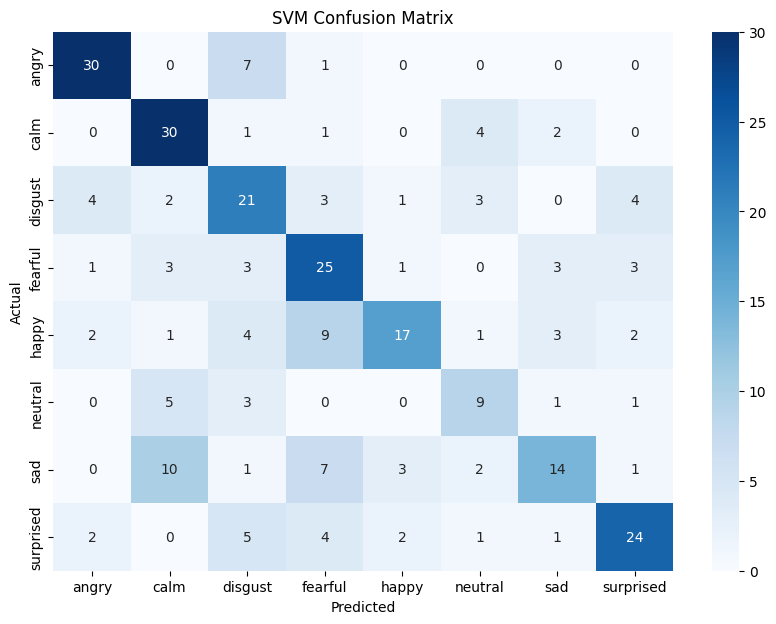

In [21]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()